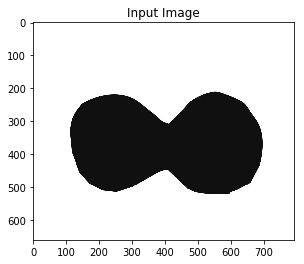

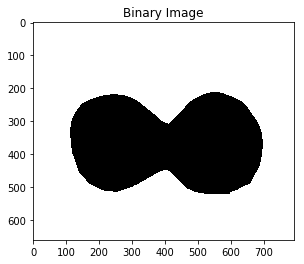

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology,feature

img = cv2.imread('test_002.png')
ret,gray = cv2.threshold(img,127,256,cv2.THRESH_BINARY)

#Input Image
plt.imshow(img)
plt.title('Input Image')
plt.show()

plt.imshow(gray)
plt.title('Binary Image')
plt.show()

In [4]:
distance = ndi.distance_transform_edt(gray)
#print(distance)

In [9]:
local_maxi =feature.peak_local_max(distance, indices=False, footprint=np.ones((8, 8)),labels=gray)
markers = ndi.label(local_maxi)[0] 
labels =morphology.watershed(-distance, markers, mask=gray) 


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.ravel()
ax0, ax1, ax2, ax3 = axes

ax1.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title("Distance")

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()

RuntimeError: sequence argument must have length equal to input rank